# Multi-Armed Bandits Part-3

**Youtube Video:-**
https://youtu.be/K9NZw3pwC1c

## Key TakeAways

1. What are initial values
2. What is Optimistic Greedy Algorithm
3. How to implement Optimistic Greedy Algorithm
4. Comparison with Epsilon-Greedy Method

## Optimistic Initial Values

- Previous methods use 0 as the default initial value for the q value estimates
- This means they depend to some extent on the initial action-value estimates Q1(a)
- You can also say they are biased by their initial estimates
- In sample-average method the bias disappears once all actions have been selected once
- For methods using constant alpha the bias is permanent, though decreasing over time
- However, in practice this bias is usually not a problem and can be very helpful sometimes

- **Downside** is that initial estimates acts as set of parameters that must be picked by the user, even if  they are set to 0
- **Upside** is that it provides an easy way to **supply some prior knowledge** about level of rewards that can be expected

### Encourage Exploration

- Initial action values can also be used as a way to encourage exploration
- Suppose that we set the action vaues for all actions to +5 in 10-armed testbed problem instead of 0
   - As we discussed in part-1 that q*(a) true action values are selected from a normal distribution with mean 0 and variance 1.
   - Initial estimate of +5 is wildy optimistic but it encourages exploration because whichever actions are initially selected the reward is less than starting estimates
   - This means the agent switches to other actions after being disappointed with the rewards it is receiving
   - This means that all actions are tried several times before the value estimates converge
   - The system does a fair amount of exploration even if greedy actions are selected all the time
  

## Implementation - Optimistic Greedy vs Epsilon Greedy method

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def add_random_walk():
    #sample_walk = np.random.normal(0,0.01)
    global q_star_a 
    q_star_a = [x + np.random.normal(0,0.01) for x in q_star_a]
    

def max_index(q_a):
    #break ties randomly
    q_a = np.array(q_a)
    return np.random.choice(np.where(q_a == q_a.max())[0])

def bandit(a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    #add_random_walk()
    reward = np.random.normal(q_star_a[a],1) 
    return reward
    
def one_run(eps,k,steps,constant_step_size=False,alpha=1.0,q_a_init=None):
    q_a = q_a_init
    n_a = [0]*k
    n_a_steps = []
    q_a_steps = []
    r_steps =[]
    a_steps =[]
    optimal_action_count = []
  
    for step in range(steps):
        if np.random.random() < eps:
            a = np.random.choice(range(k))
        else:
            a = max_index(q_a)
        r = bandit(a)
    
        if a == np.argmax(q_star_a) :
            optimal_action_count.append(1)
        else:
            optimal_action_count.append(0)
            
        a_steps.append(a)
        
        if constant_step_size:
            alpha = alpha
        else:
            n_a[a] += 1
            alpha = 1/n_a[a]
        q_a[a] = q_a[a] + (alpha) * (r - q_a[a])
       
        n_a_steps.append(n_a.copy())
        q_a_steps.append(q_a.copy())
        r_steps.append(r)
    
    return q_star_a, n_a_steps, q_a_steps, r_steps, a_steps, optimal_action_count




In [11]:
def run_bandit(n_runs=2000,n_steps=1000,eps=0.01,constant_step_size=False,alpha=1.0,initial=0.0):
    n_a_runs = []
    q_a_runs = []
    r_a_runs = []
    o_a_runs = []
    
    for run in range(n_runs):
        q_a_init = [initial]*10 
        q_star_a,n_a,q_a,r_a,a_steps,optimal_action = one_run(eps,k=10,steps=n_steps,constant_step_size=constant_step_size,alpha=alpha,q_a_init=q_a_init)
            
        n_a_runs.append(n_a.copy())
        q_a_runs.append(q_a.copy())
        r_a_runs.append(r_a.copy())
        o_a_runs.append(optimal_action.copy())
    
    r_values= np.array(r_a_runs)
    avg_rewards = r_values.mean(axis=0)

    o_values= np.array(o_a_runs)
    optimal_action_perc = o_values.mean(axis=0)
    return avg_rewards,optimal_action_perc

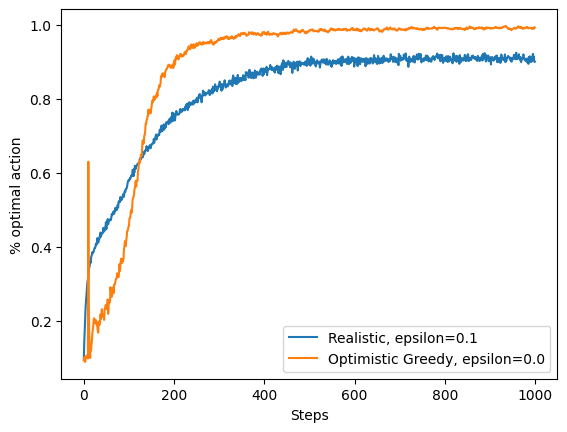

In [12]:
k=10
#Initialize true value for each action
q_star_a = np.random.normal(0,1,k)

n_steps=1000
alpha=0.1
constant_step_size=True
eps=0.1

initial=0.0
rewards,optimal_action_perc = run_bandit(n_steps=n_steps,eps=eps,constant_step_size=constant_step_size,alpha=alpha,initial=initial)
plt.plot(optimal_action_perc,label=f'Realistic, epsilon={eps}');
plt.legend()

#Assign optimistic values of 5 to initial estimates

eps=0.0
initial=5.0
rewards,optimal_action_perc = run_bandit(n_steps=n_steps,eps=eps,constant_step_size=constant_step_size,alpha=alpha,initial=initial)
plt.plot(optimal_action_perc,label=f'Optimistic Greedy, epsilon={eps}');
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

In [13]:
q_star_a

array([ 0.5723988 , -1.99559836, -1.20068567, -0.85193905, -0.3550477 ,
       -0.55233143,  2.00651625,  0.64291947,  0.3014478 ,  0.53741587])

- Initially optimistic greedy method performs worse because it explores more, but eventually it gets better because exploration decreases with time
- This technique of encouraging exploration is call Optimistic Initial values
- It is a simple trick that can be quite effective for stationary problems
- But not for non-stationary problems because its drive for exploration is temporary
  - This means if the task changes, that creates a renewed need for exploration, then this method cannot help
  - Any method that focuses on inital conditions or also called beginning of time is unlikely to help wtih general non stationary case, because beginning of time occurs only once and we should not focus on it too much
    
 

## Early Spikes

The optimistic greedy policy will explore on every initial step as all value estimates are greater
than their true value. It is possible, therefore, that it randomly selects the optimal action and
then immediately forgets it in favour of yet-to-be-explored actions. This explains the spike at
timestep ≈ 10.

## Conlcusion

In the upcoming videos we will continue our journey in the Multi-Armed Bandits and learn about
- Upper Confidence Bound (UCB) methods
- Gradient Bandit Algorithms
- Contextual bandits
- Finally a comparison of all the Bandit algorithms and decide which one is best
  